# Web scraping and analysis

Importing necessary libraries

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import string
import nltk

C:\Users\dinyz\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Scraping the customer review data from the British Airways and finding the insights from data

In [2]:
base_url='https://www.airlinequality.com/airline-reviews/british-airways'
page=20
page_size=100
reviews=[]

for i in range(1,page+1):
    url=f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response=requests.get(url)
    content=response.content
    parser_content=BeautifulSoup(content,'html.parser')
    for para in parser_content.find_all('div',{'class':'text_content'}):
        reviews.append(para.get_text())
        
    print(f"{len(reviews)} total_reviews")

100 total_reviews
200 total_reviews
300 total_reviews
400 total_reviews
500 total_reviews
600 total_reviews
700 total_reviews
800 total_reviews
900 total_reviews
1000 total_reviews
1100 total_reviews
1200 total_reviews
1300 total_reviews
1400 total_reviews
1500 total_reviews
1600 total_reviews
1700 total_reviews
1800 total_reviews
1900 total_reviews
2000 total_reviews


In [3]:
df=pd.DataFrame()
df['reviews']=reviews
df.head()

,reviews
0,"✅ Trip Verified | Absolutely terrible, lost m..."
1,✅ Trip Verified | We booked premium economy r...
2,✅ Trip Verified | We chose Rotterdam and Lond...
3,✅ Trip Verified | The entire booking and ticke...
4,Not Verified | British Airways cancelled my ...


In [4]:
df.shape

(2000, 1)

# Splitting the unnecessary Text data

Remove the unnecessary text data in scraped data

In [5]:
# splitting the data
df['reviews']=df['reviews'].str.split('|',expand=True)[1]
df.head()

,reviews
0,"Absolutely terrible, lost my luggage on both..."
1,We booked premium economy round trip from Ph...
2,We chose Rotterdam and London City airport b...
3,The entire booking and ticketing experience h...
4,British Airways cancelled my flight less th...


# Rule-based approach

without any machine learning model or any training, text is analysed by set of practical rule based approach based on labeled as 
Positive/Negative/Neutral.

# Data Preprocessing steps:

1. Cleaning the text
2. Tokenization
3. POS - tagging
4. Stopwords removal
5. Obtaining the stem words

# Cleaning The Text

Removing all special characters and numbers

In [6]:
import re
def clean(text):
    review=re.sub("[^A-Za-z]",' ',str(text))
    return review
df['Cleaned_review']=df['reviews'].apply(clean)

In [7]:
df.head()

,reviews,Cleaned_review
0,"Absolutely terrible, lost my luggage on both...",Absolutely terrible lost my luggage on both...
1,We booked premium economy round trip from Ph...,We booked premium economy round trip from Ph...
2,We chose Rotterdam and London City airport b...,We chose Rotterdam and London City airport b...
3,The entire booking and ticketing experience h...,The entire booking and ticketing experience h...
4,British Airways cancelled my flight less th...,British Airways cancelled my flight less th...


# Removing punctuation in Cleaned_review data

In [8]:
from nltk.corpus import stopwords
import string
def remove_punc(reviews):
    no_punc=[str(char) for char in reviews if char.lower() not in string.punctuation]
    no_punc="".join(no_punc)
    return no_punc
df['remove_punc']=df['Cleaned_review'].apply(remove_punc)

In [9]:
df.head()

,reviews,Cleaned_review,remove_punc
0,"Absolutely terrible, lost my luggage on both...",Absolutely terrible lost my luggage on both...,Absolutely terrible lost my luggage on both...
1,We booked premium economy round trip from Ph...,We booked premium economy round trip from Ph...,We booked premium economy round trip from Ph...
2,We chose Rotterdam and London City airport b...,We chose Rotterdam and London City airport b...,We chose Rotterdam and London City airport b...
3,The entire booking and ticketing experience h...,The entire booking and ticketing experience h...,The entire booking and ticketing experience h...
4,British Airways cancelled my flight less th...,British Airways cancelled my flight less th...,British Airways cancelled my flight less th...


# Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed on sentences(sentence tokenization) or word level(word tokenization)

# POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# Stopwords removal

Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

# Tokenize the remove_punc column and tagged POS and removing stopwords to analyze the data

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [11]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dinyz\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dinyz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
pos_dict={'J':wordnet.ADJ,'V':wordnet.VERB,'N':wordnet.NOUN,'R':wordnet.ADV}
def token_stop_pos(text):
    tag=pos_tag(word_tokenize(text))
    newlist=[]
    for word, tag in tag:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word,pos_dict.get(tag[0])]))
            #print(tag[0])
            #print(pos_dict.get(tag[0]))
    return newlist
df['POS_tagged']=df['remove_punc'].apply(token_stop_pos)

In [13]:
df.head()

,reviews,Cleaned_review,remove_punc,POS_tagged
0,"Absolutely terrible, lost my luggage on both...",Absolutely terrible lost my luggage on both...,Absolutely terrible lost my luggage on both...,"[(Absolutely, r), (terrible, a), (lost, v), (l..."
1,We booked premium economy round trip from Ph...,We booked premium economy round trip from Ph...,We booked premium economy round trip from Ph...,"[(booked, v), (premium, a), (economy, n), (rou..."
2,We chose Rotterdam and London City airport b...,We chose Rotterdam and London City airport b...,We chose Rotterdam and London City airport b...,"[(chose, v), (Rotterdam, n), (London, n), (Cit..."
3,The entire booking and ticketing experience h...,The entire booking and ticketing experience h...,The entire booking and ticketing experience h...,"[(entire, a), (booking, n), (ticketing, v), (e..."
4,British Airways cancelled my flight less th...,British Airways cancelled my flight less th...,British Airways cancelled my flight less th...,"[(British, a), (Airways, n), (cancelled, v), (..."


In [14]:
df['POS_tagged'][0]

[('Absolutely', 'r'),
 ('terrible', 'a'),
 ('lost', 'v'),
 ('luggage', 'n'),
 ('flights', 'n'),
 ('delivered', 'v'),
 ('days', 'n'),
 ('later', 'r'),
 ('smashed', 'v'),
 ('pieces', 'v'),
 ('lete', 'a'),
 ('departure', 'n'),
 ('caused', 'v'),
 ('miss', 'v'),
 ('connecting', 'n'),
 ('flight', 'n'),
 ('yielding', 'v'),
 ('hour', 'n'),
 ('delay', 'n'),
 ('aircraft', 'n'),
 ('oversubscribed', 'v'),
 ('dirty', 'n'),
 ('unpleasant', 'a'),
 ('persistent', 'n'),
 ('odour', 'v'),
 ('Food', 'n'),
 ('genuinely', 'r'),
 ('horrible', 'a'),
 ('ex', 'a'),
 ('forces', 'n'),
 ('eat', 'a'),
 ('almost', 'r'),
 ('anything', 'n'),
 ('usually', 'r')]

# Stem words techniques

The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

# Lemmatization

In [15]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer=WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew= " "
    for word, pos in pos_data:
        if not pos:
            lemma=word
            lemma_rew=lemma_rew+ " " +lemma
        else:
            lemma=wordnet_lemmatizer.lemmatize(word,pos=pos)
            lemma_rew=lemma_rew+ " " +lemma
    return lemma_rew

df['Lemma']=df['POS_tagged'].apply(lemmatize)

In [16]:
df.head()

,reviews,Cleaned_review,remove_punc,POS_tagged,Lemma
0,"Absolutely terrible, lost my luggage on both...",Absolutely terrible lost my luggage on both...,Absolutely terrible lost my luggage on both...,"[(Absolutely, r), (terrible, a), (lost, v), (l...",Absolutely terrible lose luggage flight deli...
1,We booked premium economy round trip from Ph...,We booked premium economy round trip from Ph...,We booked premium economy round trip from Ph...,"[(booked, v), (premium, a), (economy, n), (rou...",book premium economy round trip Phoenix Zuri...
2,We chose Rotterdam and London City airport b...,We chose Rotterdam and London City airport b...,We chose Rotterdam and London City airport b...,"[(chose, v), (Rotterdam, n), (London, n), (Cit...",choose Rotterdam London City airport conveni...
3,The entire booking and ticketing experience h...,The entire booking and ticketing experience h...,The entire booking and ticketing experience h...,"[(entire, a), (booking, n), (ticketing, v), (e...",entire booking ticket experience stressful e...
4,British Airways cancelled my flight less th...,British Airways cancelled my flight less th...,British Airways cancelled my flight less th...,"[(British, a), (Airways, n), (cancelled, v), (...",British Airways cancel flight less hour Auto...


# Sentiment Analysis using VADER

Valence Aware Dictionary and sEntiment Reasoner - VADSR

VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is

In [17]:
# pip install vaderSentiment

In [18]:
# Importing necessary libraries and packages for sentimental analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

# Function to calculate vader sentiment score
def vadersentimentanalysis(review):
    vader_scores=analyzer.polarity_scores(review)
    return vader_scores['compound']

df['Sentiment_score']=df['Lemma'].apply(vadersentimentanalysis)

# Function to analysis positive, negative, neutral
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
df['Sentimental_category']=df['Sentiment_score'].apply(vader_analysis)

In [19]:
df.head()

,reviews,Cleaned_review,remove_punc,POS_tagged,Lemma,Sentiment_score,Sentimental_category
0,"Absolutely terrible, lost my luggage on both...",Absolutely terrible lost my luggage on both...,Absolutely terrible lost my luggage on both...,"[(Absolutely, r), (terrible, a), (lost, v), (l...",Absolutely terrible lose luggage flight deli...,-0.9570,Negative
1,We booked premium economy round trip from Ph...,We booked premium economy round trip from Ph...,We booked premium economy round trip from Ph...,"[(booked, v), (premium, a), (economy, n), (rou...",book premium economy round trip Phoenix Zuri...,0.9623,Positive
2,We chose Rotterdam and London City airport b...,We chose Rotterdam and London City airport b...,We chose Rotterdam and London City airport b...,"[(chose, v), (Rotterdam, n), (London, n), (Cit...",choose Rotterdam London City airport conveni...,0.1531,Neutral
3,The entire booking and ticketing experience h...,The entire booking and ticketing experience h...,The entire booking and ticketing experience h...,"[(entire, a), (booking, n), (ticketing, v), (e...",entire booking ticket experience stressful e...,-0.9482,Negative
4,British Airways cancelled my flight less th...,British Airways cancelled my flight less th...,British Airways cancelled my flight less th...,"[(British, a), (Airways, n), (cancelled, v), (...",British Airways cancel flight less hour Auto...,-0.7650,Negative


In [20]:
vader_sentimental_count=df['Sentimental_category'].value_counts()
vader_sentimental_count

Positive    1006
Negative     761
Neutral      233
Name: Sentimental_category, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x21165d0a580>,
 [Text(-0.010367174777798825, 1.0999511451365132, 'Positive'),
  Text(-0.3839689355422803, -1.0308093211348686, 'Negative'),
  Text(1.2605867445178582, -0.48313668826313383, 'Neutral')],
 [Text(-0.005654822606072086, 0.5999733518926434, '50.30%'),
  Text(-0.20943760120488014, -0.5622596297099282, '38.05%'),
  Text(0.7937027650667994, -0.30419717409160274, '11.65%')])

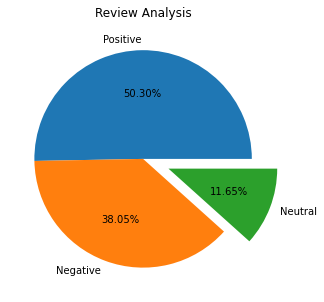

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,5))
plt.title("Review Analysis")
plt.pie(vader_sentimental_count.values,labels=vader_sentimental_count.index,explode=(0,0,.25),autopct='%0.2f%%',shadow=False)

In [22]:
#df1=df.iloc[:,[0,4,5,6]]

In [23]:
#df1=pd.DataFrame(df1)

In [24]:
#df1.to_csv("British_Airways_Reviews_Analysis")

# Wordcloud

Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

In [25]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install --upgrade Pillow

Note: you may need to restart the kernel to use updated packages.


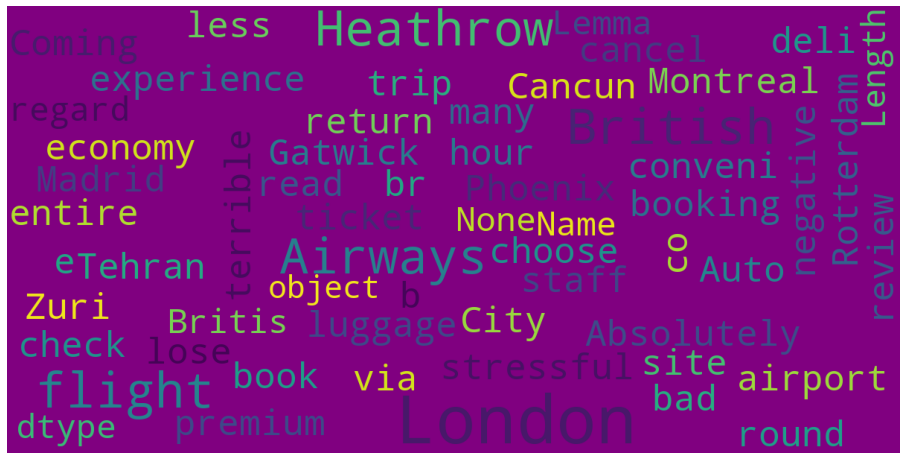

In [27]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def wordcloud_visual(data):
    wordcloud=WordCloud(
        background_color='purple',
        stopwords=stopwords,
        max_words=150,
        max_font_size=30,
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(data))
    
    fig=plt.figure(1,figsize=(16,16))
    plt.axis('off')
    
    plt.imshow(wordcloud)
    plt.show()
    
wordcloud_visual(df['Lemma'])